# Data Cleaning

In [43]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

# To allow multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [44]:
wba_data = pd.read_csv('WBA_data.csv')

In [45]:
wba_data.describe()

,Subject,Gender,AgeM,AgeY,Unnamed: 15,Lang3,Unnamed: 19,PTA0.5,PTA1,PTA2,...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
count,239.000000,239.000000,239.000000,239.000000,186.000000,0.0,217.000000,239.0,239.0,239.0,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,247.652720,0.435146,106.426778,8.868898,0.204301,NaN,0.129032,20.0,20.0,20.0,...,0.226722,0.205663,0.177513,0.177768,0.177903,0.163525,0.158900,0.153566,0.161936,0.144212
std,137.757005,0.496817,8.507157,0.708930,0.404278,NaN,0.336011,0.0,0.0,0.0,...,0.212096,0.199763,0.190303,0.184442,0.173567,0.166493,0.159699,0.165423,0.167189,0.180419
min,8.000000,0.000000,93.000000,7.750000,0.000000,NaN,0.000000,20.0,20.0,20.0,...,-0.258800,-0.230500,-0.223100,-0.190000,-0.144900,-0.125100,-0.096500,-0.099900,-0.086000,-0.116400
25%,119.500000,0.000000,100.000000,8.333333,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.073850,0.060250,0.029500,0.032900,0.039700,0.033550,0.040650,0.026950,0.035650,0.015400
50%,230.000000,0.000000,104.000000,8.666667,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.207300,0.193000,0.165800,0.154600,0.147700,0.133100,0.125500,0.118100,0.115500,0.109400
75%,369.500000,1.000000,114.000000,9.500000,0.000000,NaN,0.000000,20.0,20.0,20.0,...,0.362350,0.329050,0.288850,0.268550,0.276250,0.263550,0.253050,0.253050,0.256650,0.249400
max,496.000000,1.000000,129.000000,10.750000,1.000000,NaN,1.000000,20.0,20.0,20.0,...,0.935300,0.916400,0.897900,0.895400,0.879700,0.855800,0.816600,0.774000,0.772400,0.856400


## Control Variables

Creating function to keep a `colnames` variable and update it whenever a column is deleted, for convenience.

In [46]:
def update_colnames():
    """
    Returns all remaining non-frequency column names
    """
    colnames = [c for c in wba_data.columns if c[:2] != "f("]
    return colnames

In [47]:
# Type in whenever a column is deleted/changed:
colnames = update_colnames()
print(colnames)

['Subject', 'Gender', 'DOT', 'DOB', 'AgeM', 'AgeY', 'Eth1', 'Eth2', 'Unnamed: 15', 'Lang1', 'Lang2', 'Lang3', 'Unnamed: 19', 'PTA0.5', 'PTA1', 'PTA2', 'PTA4', 'PTAAv4FA', 'PTAAv4FAPoF', 'PTAAv4FAPoFC', 'Unnamed: 49', 'ECV', 'TPP', 'SC', 'TympType', 'TympPoF', 'Unnamed: 55', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4', 'OAEPoF', 'OAEPoFC', 'OverallPoF', 'Unnamed: 64', 'EarSide', 'Ear coded', 'Pressure']


Unnamed Columns

Upon investigation of the unnamed columns, none of them are desireable except Unnamed: 15. It is a Caucasian/non-Caucasian (0/1) binary variable. We will impute missing values with 2.

In [48]:
# Renaming column
wba_data = wba_data.rename(columns = {"Unnamed: 15": "Ethnicity"})
colnames = update_colnames()

# Imputing missing values with `2`
wba_data.loc[wba_data["Ethnicity"].isna(), "Ethnicity"] = 2

Deleting unnamed columns

In [49]:
unnamed_cols = [c for c in colnames if c[:7] == "Unnamed"]
print("Deleting columns {}".format(unnamed_cols))
wba_data = wba_data.drop(unnamed_cols, axis=1)

Deleting columns ['Unnamed: 19', 'Unnamed: 49', 'Unnamed: 55', 'Unnamed: 64']


### Language Columns

Deleting language columns as they have many missing values and ethnicity would likely be a better control variable measuring the same concept.

In [50]:
lang_cols = [c for c in colnames if c[0:4] == "Lang"]
print("Deleting columns {}".format(lang_cols))
wba_data = wba_data.drop(lang_cols, axis=1)

Deleting columns ['Lang1', 'Lang2', 'Lang3']


In [51]:
colnames = update_colnames()
print(colnames)

['Subject', 'Gender', 'DOT', 'DOB', 'AgeM', 'AgeY', 'Eth1', 'Eth2', 'Ethnicity', 'PTA0.5', 'PTA1', 'PTA2', 'PTA4', 'PTAAv4FA', 'PTAAv4FAPoF', 'PTAAv4FAPoFC', 'ECV', 'TPP', 'SC', 'TympType', 'TympPoF', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4', 'OAEPoF', 'OAEPoFC', 'OverallPoF', 'EarSide', 'Ear coded', 'Pressure']


# Unwanted Columns

We remove columns that we do not use in our machine learning models

"DOB", "DOT", "AgeM" - All track the age of the patient, we use "AgeY" (age in years) in our model

EarSide - We use "EarCode", 0/1 for left/right ear

In [52]:
wba_data = wba_data.drop(["DOB", "DOT", "AgeM", "EarSide"], axis=1)

"Ethnicity" is highly inbalanced as we see, the observations are largely Causcasian (0)

In [53]:
wba_data["Ethnicity"].value_counts()

0.0    148
2.0     53
1.0     38
Name: Ethnicity, dtype: int64

In [54]:
wba_data = wba_data.drop("Ethnicity", axis=1)

Drop all pass or fail columns other than "OverallPoF" (overall pass or fail) that we use as our classification labels in our ML model

In [55]:
pof_cols = [col for col in wba_data.columns if col != "OverallPoF" and col[-3:] == "PoF" or col[-4:] == "PoFC"]
pta_cols = [col for col in wba_data.columns if col[:3] == "PTA"]
print("Deleting {}".format(pof_cols + pta_cols))
wba_data = wba_data.drop(pof_cols + pta_cols, axis=1)

Deleting ['PTAAv4FAPoF', 'PTAAv4FAPoFC', 'TympPoF', 'OAEPoF', 'OAEPoFC', 'PTA0.5', 'PTA1', 'PTA2', 'PTA4', 'PTAAv4FA', 'PTAAv4FAPoF', 'PTAAv4FAPoFC']


In [56]:
colnames = update_colnames()
print(colnames)

['Subject', 'Gender', 'AgeY', 'Eth1', 'Eth2', 'ECV', 'TPP', 'SC', 'TympType', 'OAE1', 'OAE1.4', 'OAE2', 'OAE2.8', 'OAE4', 'OverallPoF', 'Ear coded', 'Pressure']


### Histogram

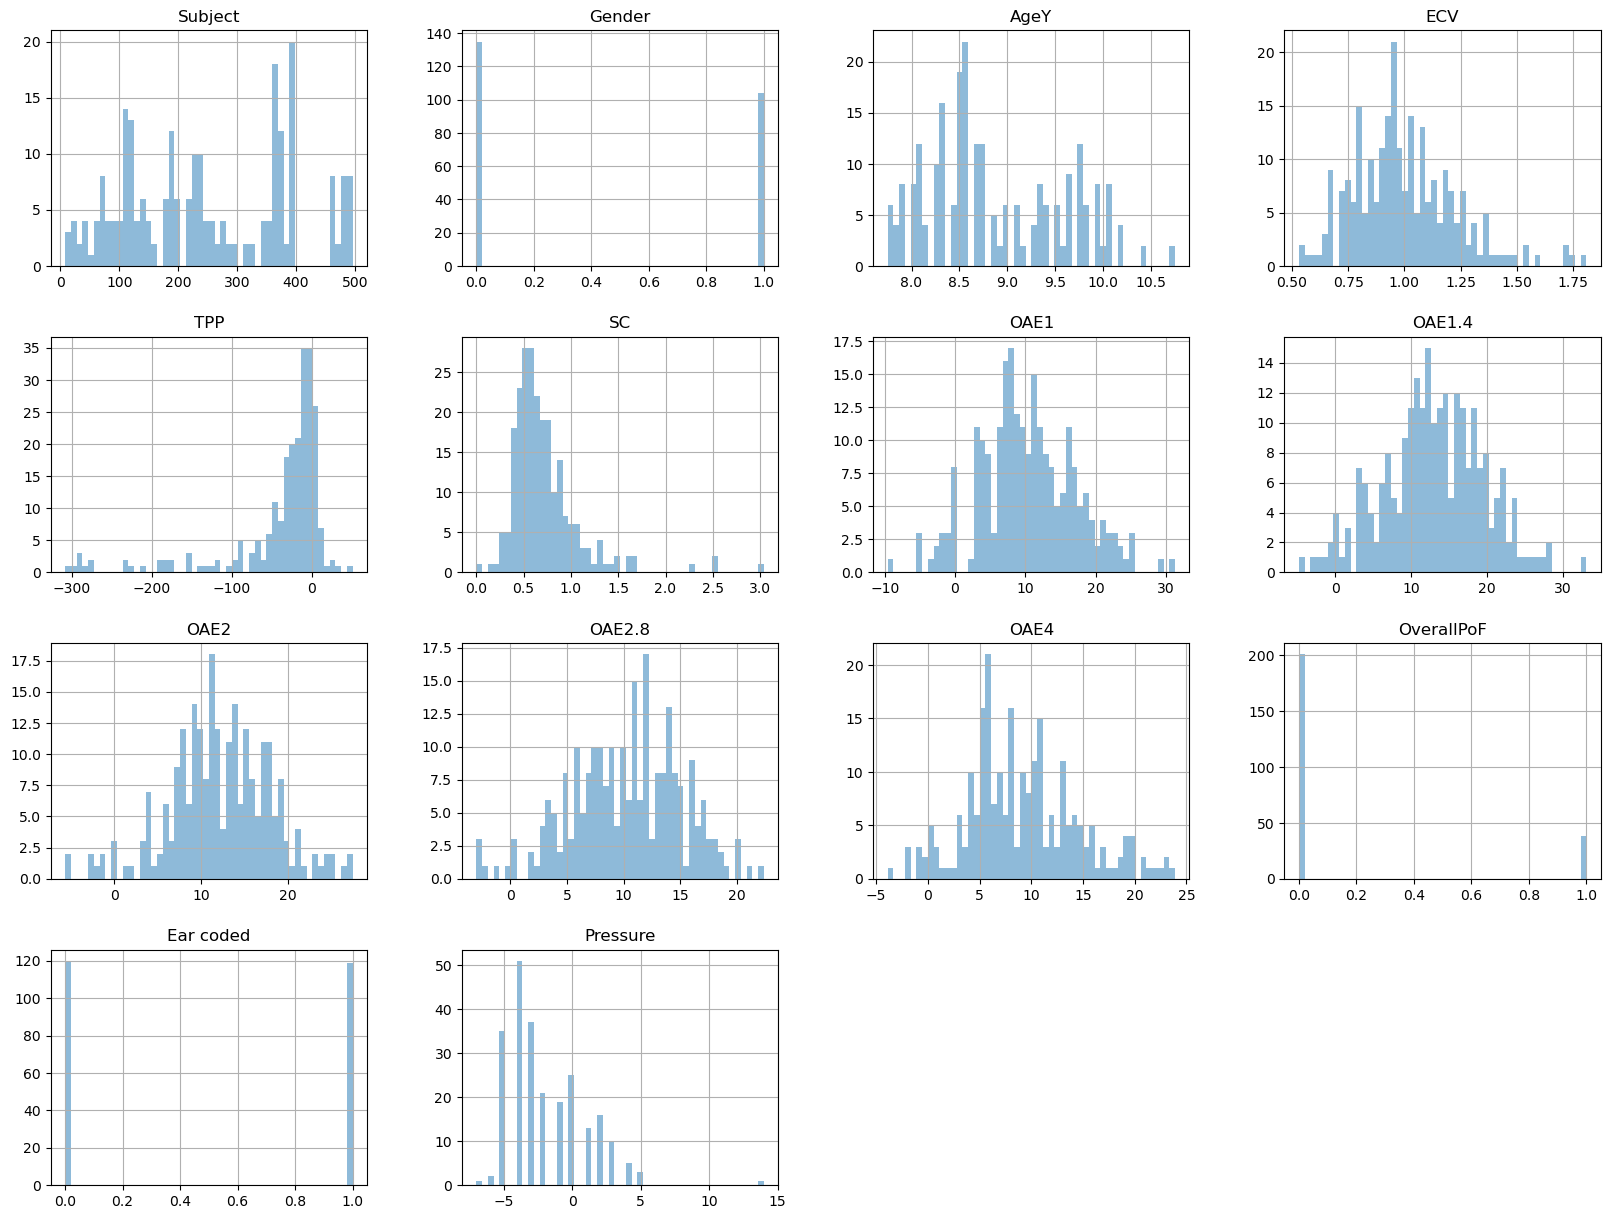

In [57]:
hist_control = wba_data[colnames].hist(
    bins=50,
    figsize=(20,15),
    alpha = 0.5
    )

### Ethnicity

[None, None, None, None, None, None, None, None, None, None, None, None]

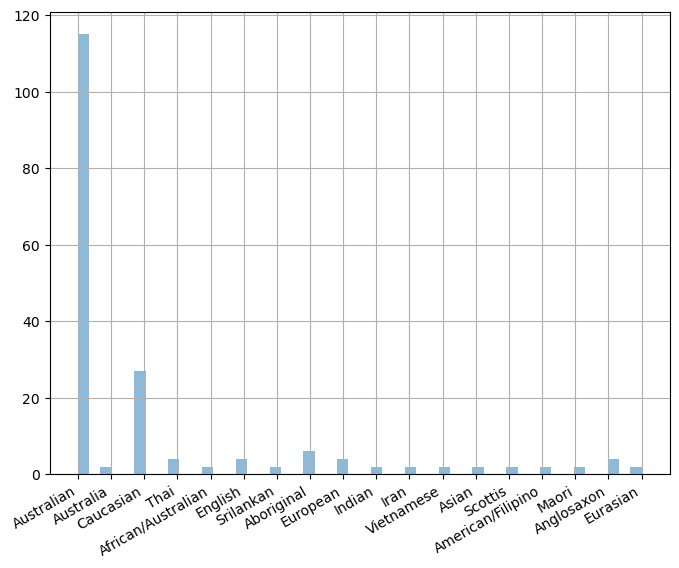

In [58]:
# Plotting histogram of ethnicity
fig, ax = plt.subplots()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
hist_all = wba_data['Eth1'].hist(
    bins=50,
    figsize=(8,6),
    alpha = 0.5
)


Unfortunately it seems that there are not enough observations of each ethnicity (besides Australian/Caucasian) to effectively use these ethnicity columns. We will delete these. The previously mentioned binary ethnicity column will be used to consider ethnic variability of hearing. Although this is sub-optimal, as it only considers Caucasians, it is the best we can do give the available data.

In [59]:
wba_data = wba_data.drop(['Eth1', 'Eth2'], axis=1)
colnames = update_colnames()

### Imputing Missing/NA Values

In [60]:
wba_data[colnames].columns[wba_data[colnames].isna().any()].tolist()

['TPP', 'SC']

`TPP` and `SC` still have NA values remaining.

In [61]:
wba_data.loc[wba_data['TPP'].isna(), 'TPP']
wba_data.loc[wba_data['SC'].isna(), 'SC']

51    NaN
63    NaN
170   NaN
Name: TPP, dtype: float64

51    NaN
63    NaN
170   NaN
Name: SC, dtype: float64

There are only three observations that have missing values, and they are the same observations for both `TPP` and `SC` (51, 63, 170).

Idea 1: Imput mean of observations with same `TympType`.

In [62]:
wba_data.loc[wba_data['TympType'] == wba_data['TympType'][51]]['TympType']

51     B
63     B
170    B
Name: TympType, dtype: object

Issue: All three of these observations have the same `TympType` (B) and they are the only observations with that `TympType`. Instead, we must then imput the mean values of all observations. 

Replacing NA values with mean.

In [63]:
for col in ['TPP', 'SC']:
    wba_data.loc[wba_data[col].isna(), col] = np.nanmean(wba_data[col])

No more columns with missing values

In [64]:
wba_data[colnames].columns[wba_data[colnames].isna().any()].tolist()

[]

No more NA values remaining.

## Tymphanic Membrane Type

For `TympType`, A is Normal and B, C1 and C2 are abnormal. We will convert this to a normal/abnormal binary columns. We do this because machine learning functions within `sklearn` do not deal with categorical data well.


We do not label them 1, 2, 3, 4, etc. because we do not want the machine learning algorithms to assume that these classes are ordinal in nature (as they are not).If we want to improve this, we should find some way to encode the `TympType`s to ensure that they are orthogonal, besides a binary method (to presever, B, C1, C2 difference).

In [65]:
wba_data['TympType'].unique()

array(['C1', 'A', 'C2', 'B'], dtype=object)

In [66]:
wba_data.TympType.replace(to_replace=dict(A='1',B='0',C1='0',C2='0'), inplace=True)

In [67]:
wba_data['TympType'].unique()

array(['0', '1'], dtype=object)

## WBA Columns

In [68]:
freq_colnames = [c for c in wba_data.columns if c[:2] == "f("]

### Histograms

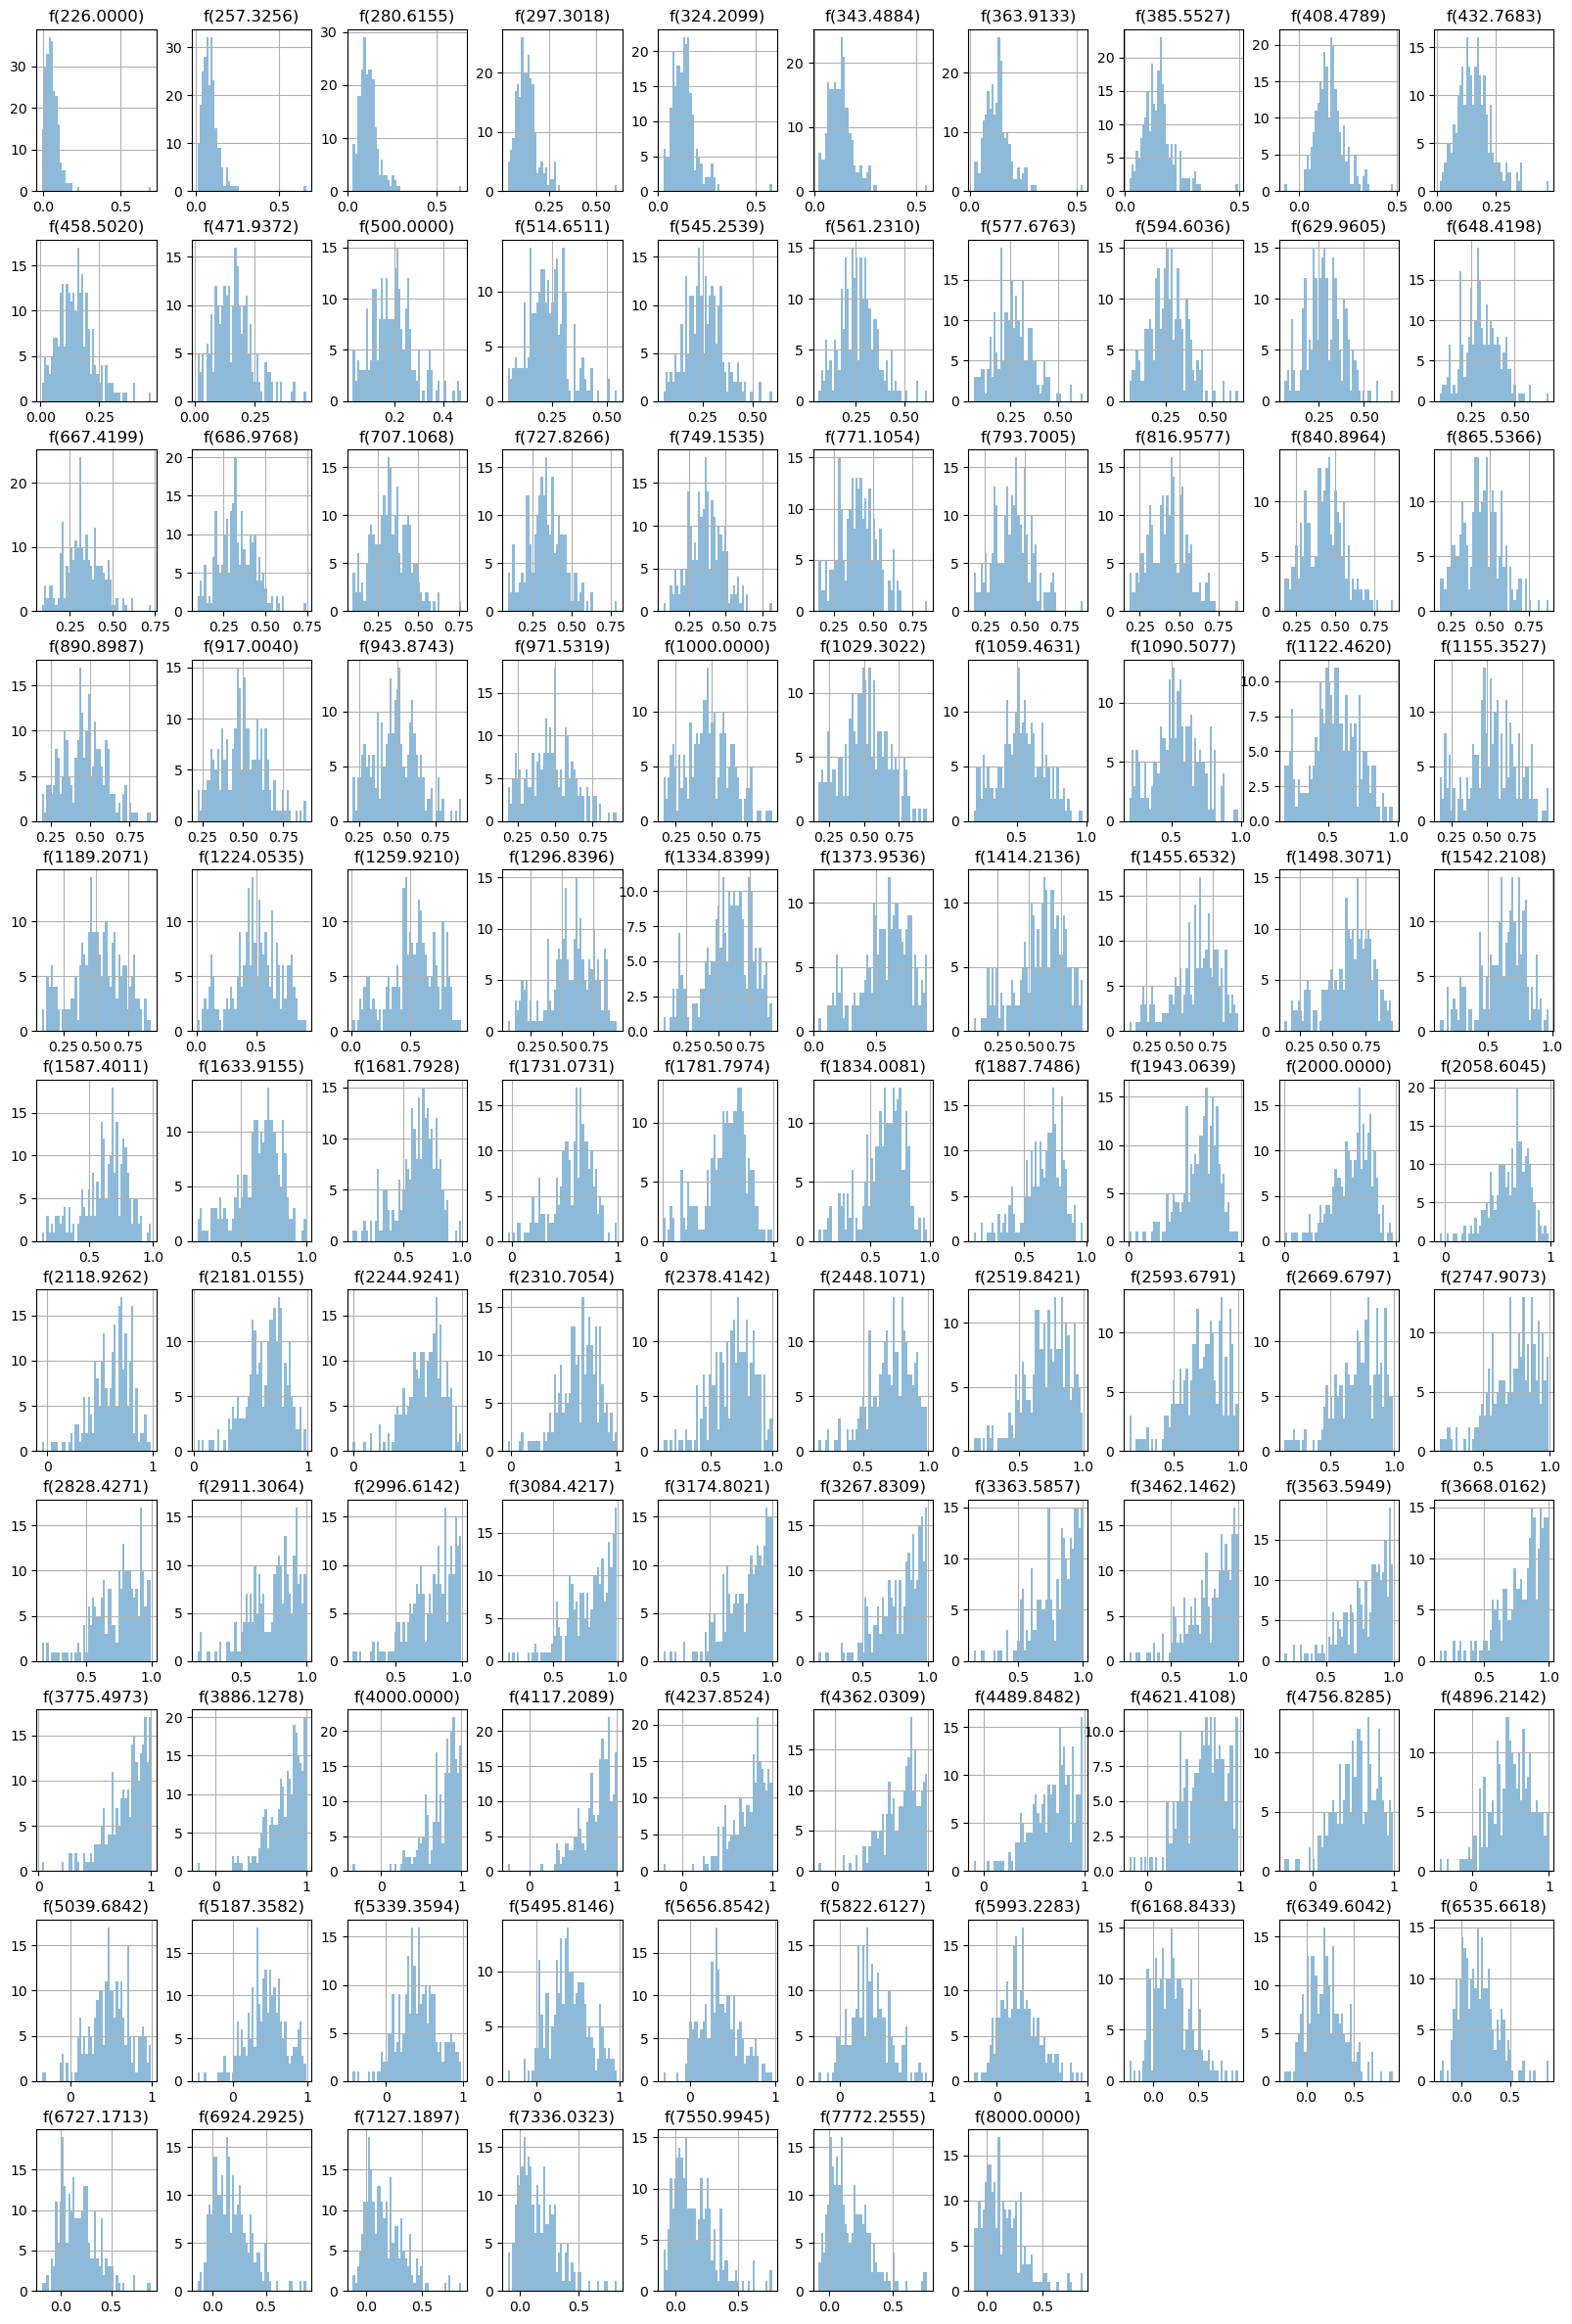

In [69]:
hist_freq = wba_data[freq_colnames].hist(
    bins=50,
    figsize=(20,30),
    alpha = 0.5
    )

Checking for NA values in WBA frequency columns

In [70]:
wba_data[freq_colnames].columns[wba_data[freq_colnames].isna().any()].tolist()

[]

No NA Values.

Checking for values greater than 1 in WBA frequency columns

In [71]:
wba_data[freq_colnames].gt(1).any().any()

False

No absorbance values greater than 1.

Checking for negative values in WBA frequency columns

In [72]:
wba_data[freq_colnames].lt(0).any().any()

True

A `True` result means that negative values exist.
Wideband Absorbance take a values can only exist in the range 0-1

Looping through each frequency and replacing negative values with `0`.

In [73]:
for freq in freq_colnames:
    wba_data.loc[wba_data[freq] < 0, freq] = 0

In [74]:
wba_data[freq_colnames].lt(0).any().any()

False

No more negative values remaining.

# Principal Component Analysis

In [75]:
from sklearn.decomposition import PCA
import seaborn as sns

## Scaling Data

It is important to scale the data to ensure that columns are comparable to each other. We will standardise each of the frequency columns.

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

freqs = wba_data[freq_colnames]

scaler.fit(freqs)

freqs_std = scaler.transform(freqs)

StandardScaler()

## PCA

In [77]:
def wba_pca(var_preserve, freqs_std):
    """
    var_preserve: amount of variance you wish to preserve (decimal)
    freqs_std: scaled (standardised) frequencies (dataframe)
    Returns principal components (numpy array), number of components (int), PCA object
    """
    pca = PCA(n_components = var_preserve)

    components = pca.fit_transform(freqs_std)

    n_components = components.shape[1]

    print("Preserving {0}% variance...".format(var_preserve*100))
    print("107 frequencies reduced to {0} components.".format(n_components))

    return components, n_components, pca

components, n_components, pca = wba_pca(var_preserve = 0.99, freqs_std=freqs_std)

Preserving 99.0% variance...
107 frequencies reduced to 15 components.


## Assessing Component Variability Contribution

In [78]:
pc_list = ["PC"+str(i) for i in list(range(1, n_components+1))]
print([p for p in pc_list])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']


The following variability contribution bar chart will be outputted in the same directory as this notebook.

<Figure size 800x480 with 0 Axes>

<BarContainer object of 15 artists>

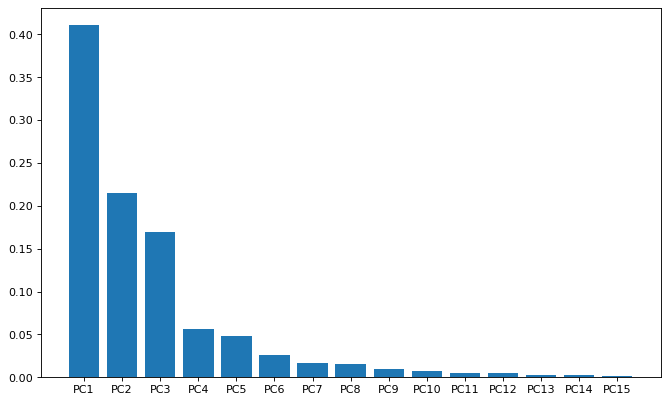

In [79]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(pc_list, pca.explained_variance_ratio_)

In [80]:
pc_df = pd.DataFrame(components, columns = pc_list)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,8.842811,4.602442,6.650183,3.921888,-1.261711,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,0.409498,2.915318,2.149802,0.805619,-0.756510,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,-4.250247,6.157587,4.050205,0.997024,1.200107,-0.343253,-0.215469,-0.777275,-1.703650,0.510768,-0.413348,-0.206985,-0.375959,0.339409,-0.049631
3,-3.358109,2.419031,-5.375304,-2.836131,-0.626075,-0.603940,1.065511,1.333238,0.796636,0.454654,-0.116502,0.247162,0.303749,-0.243954,-0.046242
4,-6.687540,11.855088,1.251906,-0.700132,-0.092689,-0.434886,2.172756,0.895713,1.079165,1.445886,0.345314,-1.758196,0.268712,-0.148645,-0.204201


In [81]:
wba_data = pd.concat([wba_data, pc_df], axis=1)

Saving final cleaned dataset

In [82]:
wba_data.to_csv('./wba_data_CLEAN.csv')